In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
from qiskit.tools.monitor import job_monitor
%matplotlib inline

# Loading your IBM Quantum account(s)
IBMQ.save_account('7e2c2b431b74f4ff3d3b86e3ae02bc34ce0bb62d96363d6fd8188ac974567be3b31d3121b5a1130c0373e3c4c7410684eb74d4946d32f378ad58e7722f6ba146', overwrite=True)
IBMQ.load_account()
provider = IBMQ.get_provider(hub = 'ibm-q')
deviceReal = provider.get_backend('ibmq_lima')
deviceSim = BasicAer.get_backend('qasm_simulator')


In [2]:
def createEntangled():
    es = QuantumCircuit(2)
    es.h(1)
    es.cx(1, 0)
    return es

In [3]:
def decode(de):
    de.cx(1,0)
    de.h(1)
    return de

In [4]:
def encode(sdc,msg):
    if msg == "00":
        sdc.i(1)
        return sdc
    elif msg == "01":
        sdc.x(1)
        return sdc
    elif msg == "10":
        sdc.z(1)
        return sdc
    else :
        sdc.y(1)
        return sdc
    

In [5]:
def misurazioniSim(sdc):
    job = execute(sdc, backend = deviceSim)
    device_result = job.result().get_counts()
    return device_result;

In [6]:
def misurazioniReal(sdc):
    job = execute(sdc,backend = deviceReal,shots = 1024)
    print(job.job_id())
    job_monitor(job)
    device_result = job.result().get_counts()
    return device_result

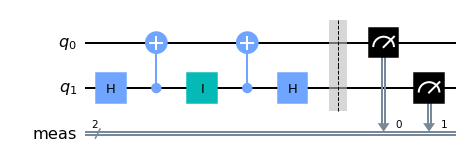

In [7]:
#Alice vuole mandare i bit 00 a Bob
sdc = createEntangled()
sdc = encode(sdc,"00") #Alice invia
sdc = decode(sdc) #Bob riceve
sdc.measure_all()
sdc.draw('mpl')

61e7d712e6d39ddcead1d291
Job Status: job has successfully run


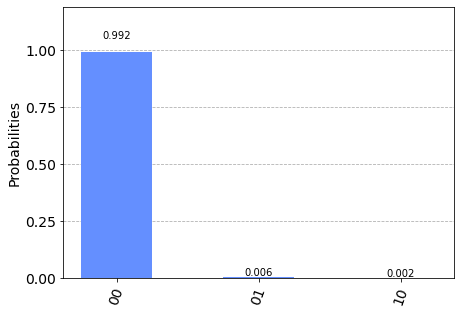

In [8]:
    device_result = misurazioniReal(sdc)
    plot_histogram(device_result)

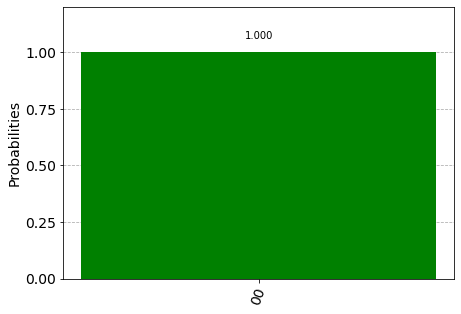

In [9]:
device_result = misurazioniSim(sdc)
plot_histogram(device_result, color='green')

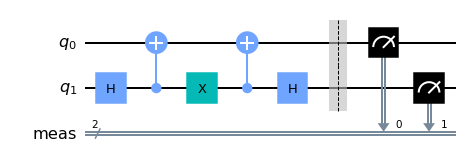

In [10]:
#Alice vuole mandare i bit 01 a Bob
sdc = createEntangled()
sdc = encode(sdc,"01") #Alice invia
sdc = decode(sdc) #Bob riceve
sdc.measure_all()
sdc.draw('mpl')

61e7d85afb45c3aa88a3f771
Job Status: job has successfully run


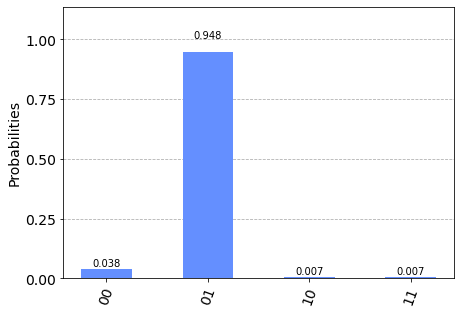

In [11]:
    device_result = misurazioniReal(sdc)
    plot_histogram(device_result)

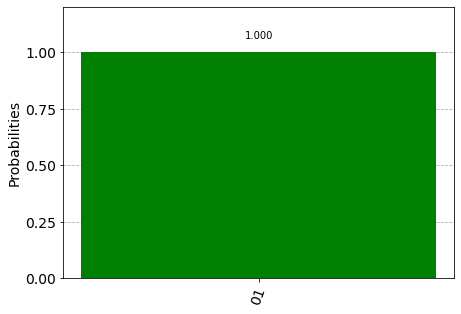

In [12]:
device_result = misurazioniSim(sdc)
plot_histogram(device_result, color='green')

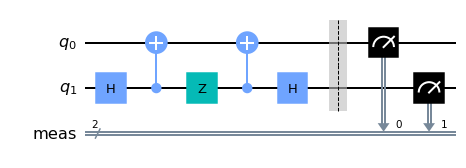

In [13]:
#Alice vuole mandare i bit 10 a Bob
sdc = createEntangled()
sdc = encode(sdc,"10") #Alice invia
sdc = decode(sdc) #Bob riceve
sdc.measure_all()
sdc.draw('mpl')

61e7d9e0b9cc87c4800c8ff7
Job Status: job has successfully run


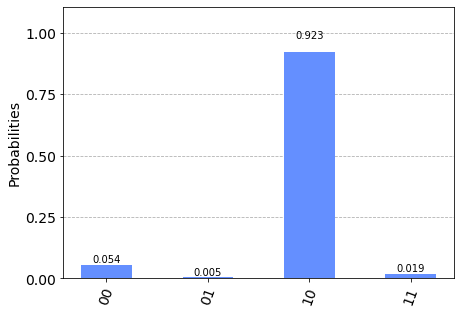

In [14]:
device_result = misurazioniReal(sdc)
plot_histogram(device_result)

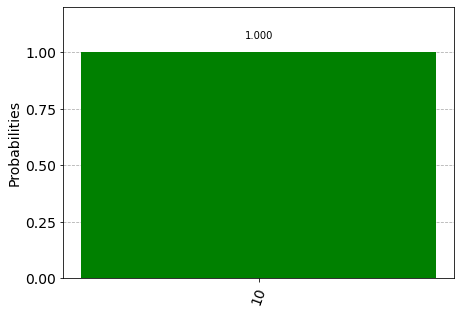

In [15]:
device_result = misurazioniSim(sdc)
plot_histogram(device_result, color='green')

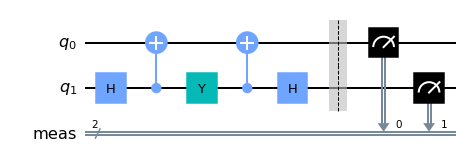

In [16]:
#Alice vuole mandare i bit 11 a Bob
sdc = createEntangled()
sdc = encode(sdc,"11") #Alice invia
sdc = decode(sdc) #Bob riceve
sdc.measure_all()
sdc.draw('mpl')

61e7db484fbe5c56d92f9036
Job Status: job has successfully run


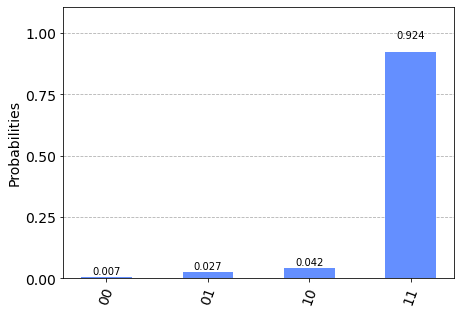

In [17]:
device_result = misurazioniReal(sdc)
plot_histogram(device_result)

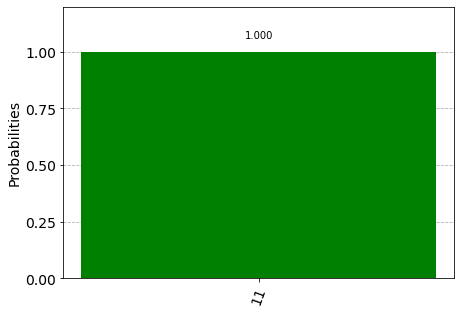

In [18]:
device_result = misurazioniSim(sdc)
plot_histogram(device_result, color='green')